In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, Adam, L_BFGS
from neural_stylization.util.build_callback import build_callback
from neural_stylization.util.img_util import load_image

Using TensorFlow backend.


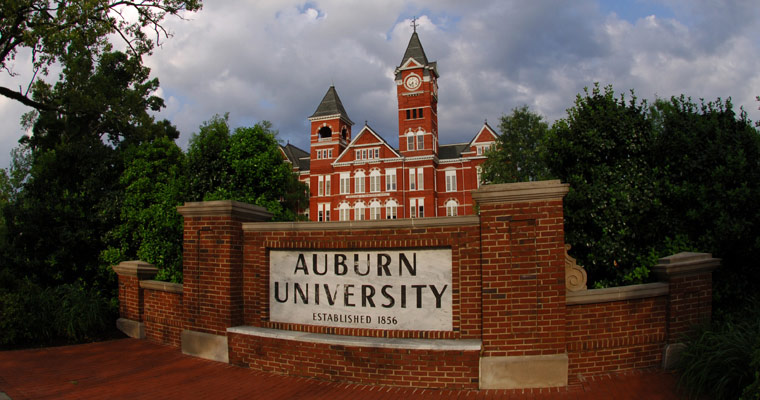

In [5]:
# the shape to load content, style, and ouptut as (w, h)
# None implies the size of the content will be used
image_size = None
# the location of the base content image
content_path = 'img/content/samford-sign.jpg'
# load and view the image with its dimensions
load_image(content_path, image_size)

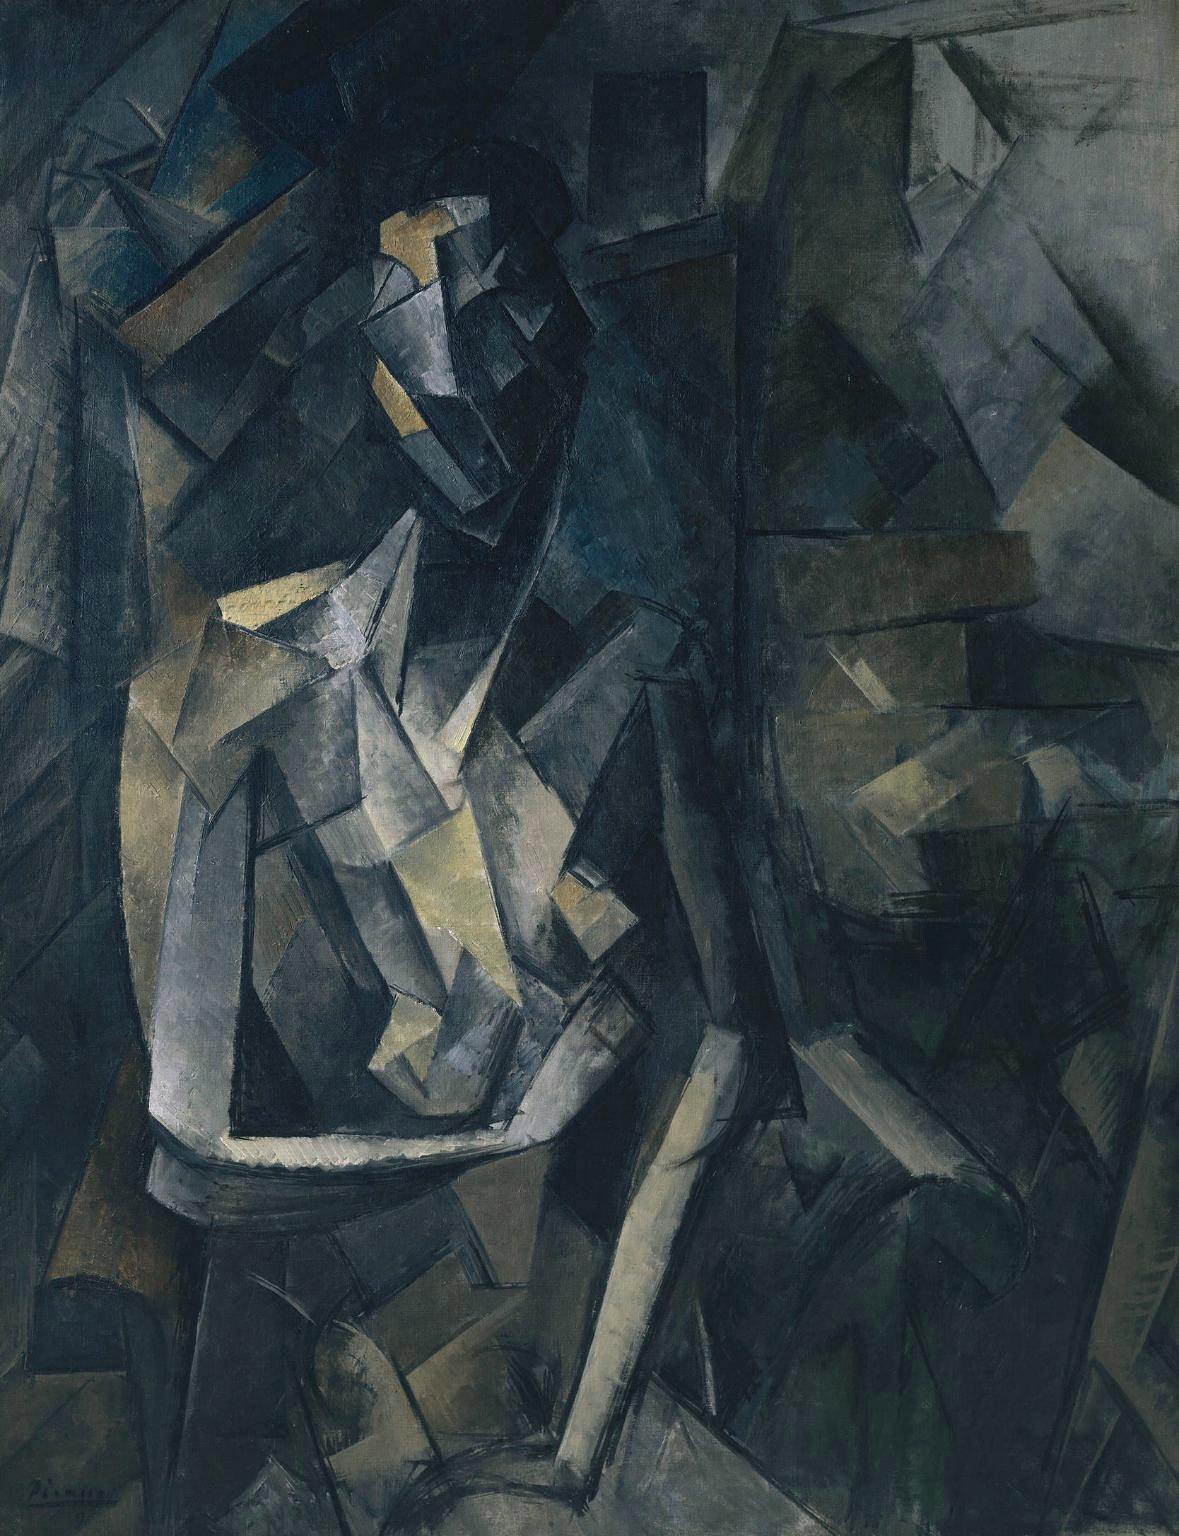

In [6]:
# the location of the base style image
style_path = 'img/styles/seated-nude.jpg'
# load and view the image with its dimensions
load_image(style_path, image_size)

In [7]:
!mkdir -p tex/img/content-layer-selection

In [8]:
def stylize(iterations: int, content_layer_name: str):
    """
    Stylize the image.
    
    Args:
        iterations: the number of iterations to optimize
        content_layer_name: the name of the content layer to use
        
    Returns: a stylized image
    """
    # create a stylization algorithm
    sty = Stylizer(content_weight=1, style_weight=1e4, content_layer_name=content_layer_name)
    # create directories for build artifacts
    build_dir = 'build/content-layer-selection/{}'.format(content_layer_name)
    # create an optimizer for the stylizer
    adam = Adam(learning_rate=1e2)
    # run the stlization algorithm and store the result
    img = sty(
        content_path=content_path,
        style_path=style_path,
        optimize=adam,
        iterations=iterations,
        image_size=image_size,
        callback=build_callback(build_dir)
    )
    # save the image to the tex directory
    tex_out = 'tex/img/content-layer-selection/{}.png'.format(content_layer_name)
    img.save(tex_out)

In [9]:
# the maximum number of times each optimizer is allowed to 
# evaluate the gradients before termination
max_evaluations = 250

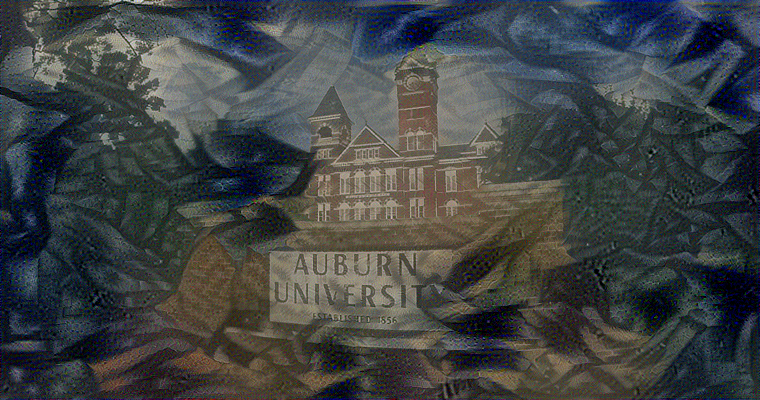

100%|██████████| 250/250 [01:46<00:00,  2.35it/s]


In [10]:
stylize(max_evaluations, 'block1_conv1')

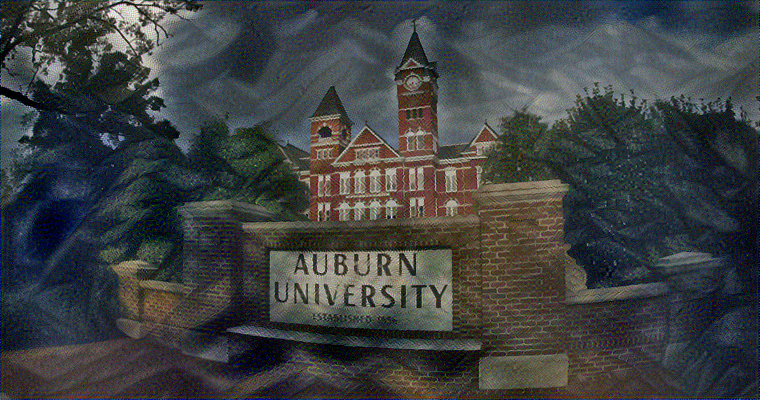

100%|██████████| 250/250 [01:42<00:00,  2.44it/s]


In [11]:
stylize(max_evaluations, 'block2_conv1')

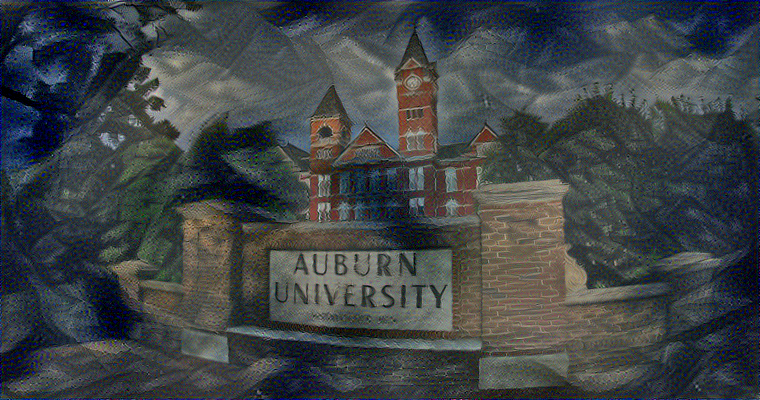

100%|██████████| 250/250 [01:41<00:00,  2.45it/s]


In [12]:
stylize(max_evaluations, 'block3_conv1')

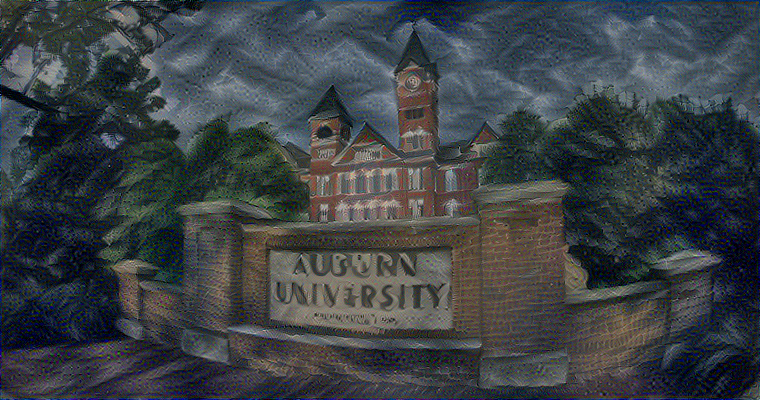

100%|██████████| 250/250 [01:41<00:00,  2.47it/s]


In [13]:
stylize(max_evaluations, 'block4_conv1')

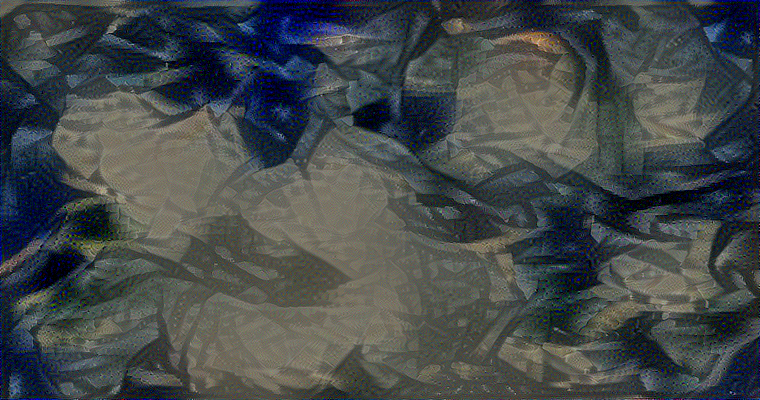

100%|██████████| 250/250 [01:41<00:00,  2.46it/s]


In [14]:
stylize(max_evaluations, 'block5_conv1')